In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [19]:
def wrangle(csv_path):
    df = pd.read_csv(csv_path)
    df.set_index("Id")  # Set the index inplace
    df.drop(columns="Id", inplace=True)  # Drop the "Id" column inplace
    class_mapping = {'Iris-setosa':1,'Iris-versicolor':2, 'Iris-virginica':3}
    # Replace values in the "Species" column and assign it back
    df['encoded_Species'] = df['Species'].replace(class_mapping)
    df.drop(columns="Species", inplace=True)
    return df

In [20]:
df_read = wrangle("Iris.csv")

In [21]:
df_read.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,encoded_Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [23]:
df_read["encoded_Species"].value_counts()

1    50
2    50
3    50
Name: encoded_Species, dtype: int64

In [24]:
df_plot=df_read.groupby("PetalWidthCm")["encoded_Species"].mean().sort_values(ascending=False)

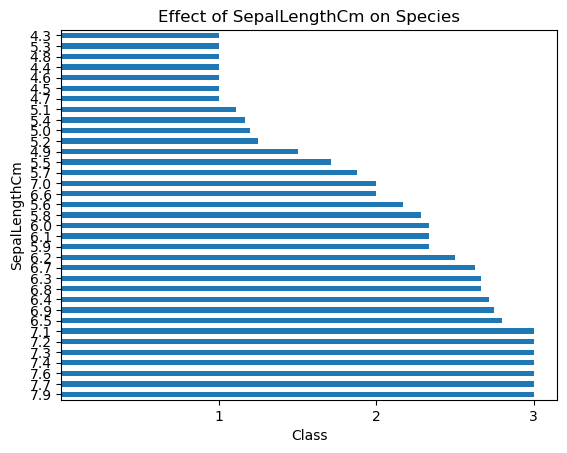

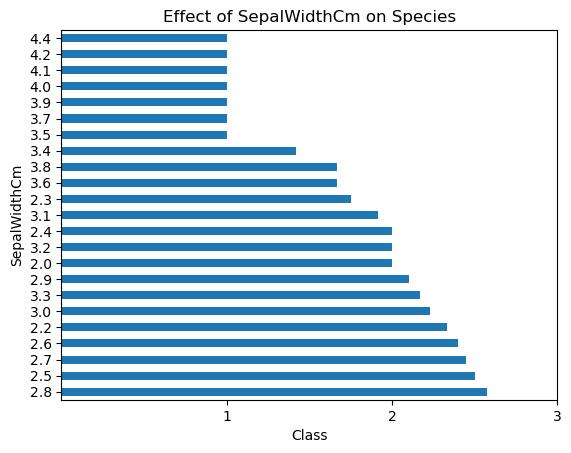

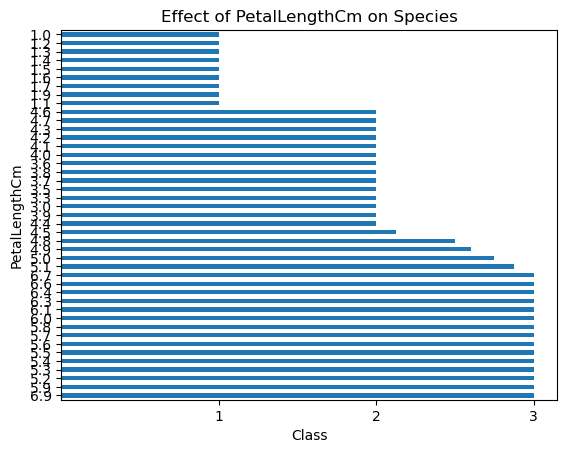

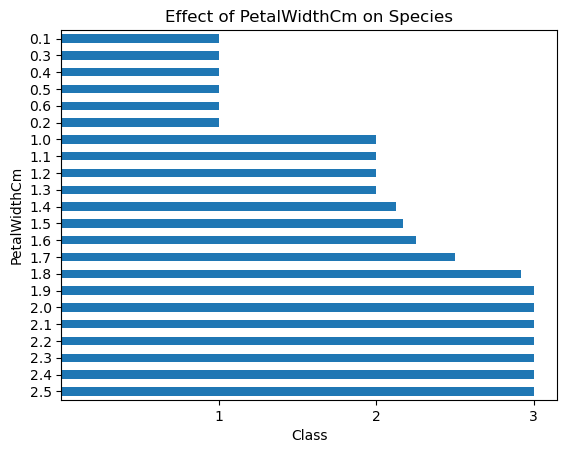

In [45]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plotting for each feature column
for feature_column in feature_columns:
    df_plot = df_read.groupby(feature_column)["encoded_Species"].mean().sort_values(ascending=False)
    ax = df_plot.plot(kind="barh", legend=False)

    ax.set_xlabel("Class")
    ax.set_ylabel(feature_column)
    ax.set_title(f"Effect of {feature_column} on Species")
    ax.set_xticks(df_read['encoded_Species'].unique())

    plt.show();

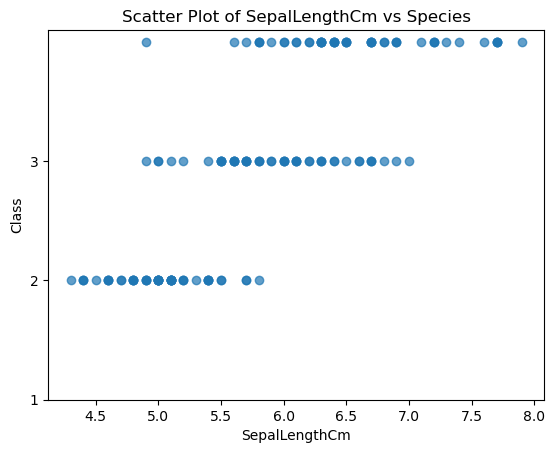

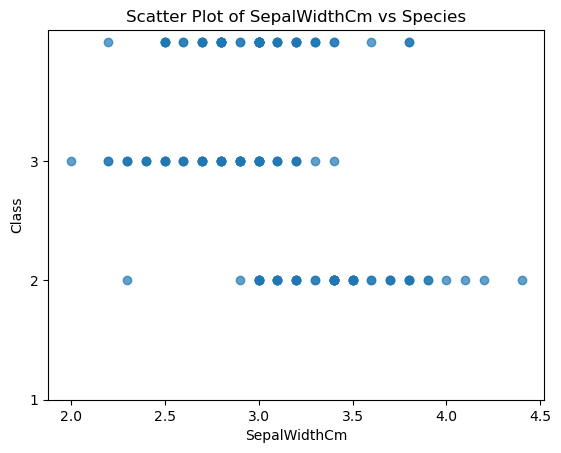

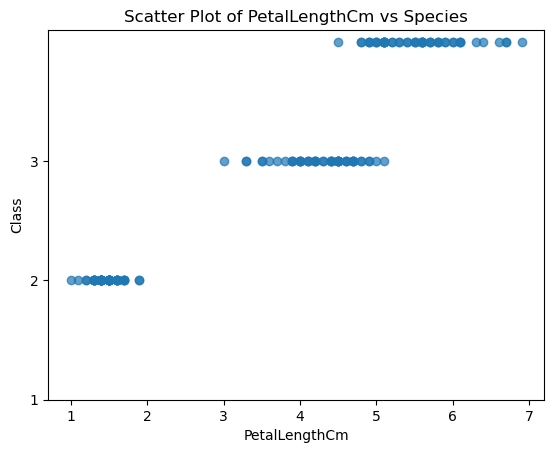

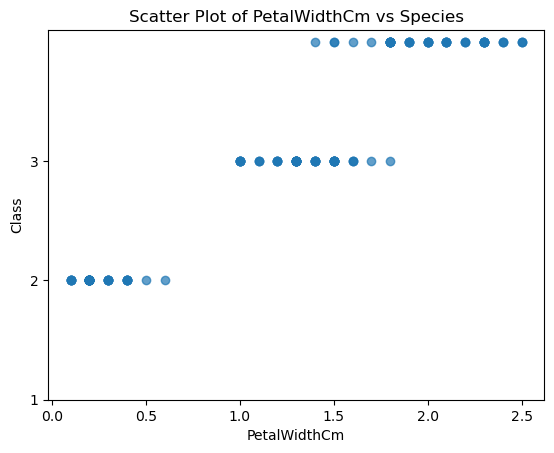

In [47]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plotting scatter plots for each feature column
for feature_column in feature_columns:
    # Create a scatter plot
    plt.scatter(df_read[feature_column], df_read['encoded_Species'], alpha=0.7)
    
    plt.xlabel(feature_column)
    plt.ylabel("Class")
    plt.title(f"Scatter Plot of {feature_column} vs Species")
    
    # Set y-axis ticks to be the unique values of encoded species
    plt.yticks(range(len(df_read['encoded_Species'].unique())), df_read['encoded_Species'].unique())
    
    plt.show()

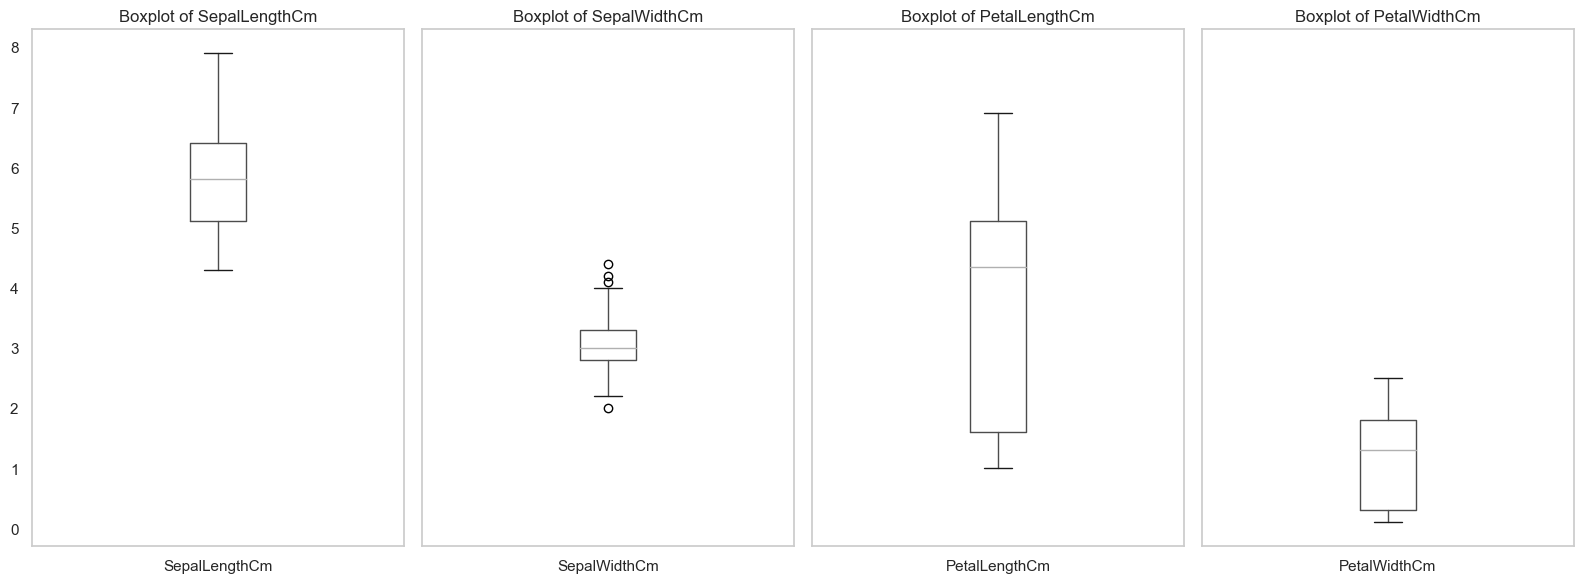

In [51]:
import matplotlib.pyplot as plt

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(feature_columns), figsize=(16, 6), sharey=True)

# Plot boxplots for each feature column
for i, feature_column in enumerate(feature_columns):
    df_read.boxplot(column=feature_column, ax=axes[i], grid=False)
    axes[i].set_title(f"Boxplot of {feature_column}")
    axes[i].set_xlabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [58]:
# Assuming df_read is your DataFrame with 'encoded_Species' as the target variable
# Step 2: Split data into features (X) and target variable (y)
X = df_read.drop(columns=['encoded_Species'])
y = df_read['encoded_Species']

In [61]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 4: Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Step 5: Create an SVC model
svc_model = SVC(random_state=42)
# Step 6: Train the model on the training data
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [65]:
# Step 7: Evaluate the model on the testing data
y_pred = svc_model.predict(X_test_scaled)
# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [66]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



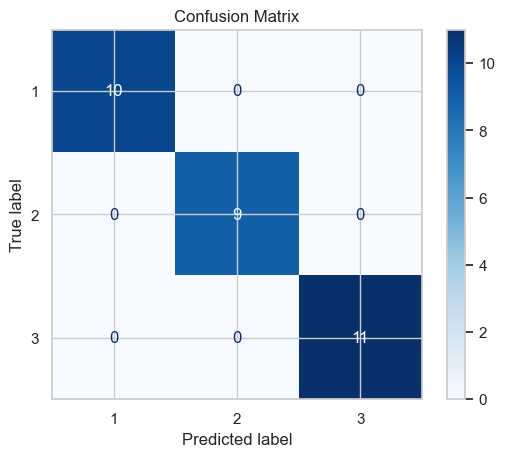

In [79]:
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_read['encoded_Species'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# End